In [1]:
# Model_building.ipynb

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats.distributions import chi2 
import seaborn as sns


In [2]:
# Load the transformed data
df = pd.read_csv('C:/Users/HP/Desktop/times_series_project/Datasets/IPG2211A2N.csv')
df.columns = ['Date', 'Production']
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Set DATE as the index 
df.set_index('Date', inplace=True)
df_xg = df.copy() 
df['Log_Production'] = np.log(df['Production'])
df['Diff_Production'] = df['Log_Production'].diff().dropna()
df['Seasonal_Diff_Production'] = df['Diff_Production'].diff(12).dropna().dropna()




In [3]:
# Split the data into training and testing sets (80-20 split)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



## The LLR TEST

In [4]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## ARIMA MODEL

In [5]:
model_ret_ar_1_i__ma_1 = ARIMA(train.Log_Production[1:], order=(1,1,1))
results_ret_ar_1_i_ma_1 = model_ret_ar_1_i__ma_1.fit()
results_ret_ar_1_i_ma_1.summary()

c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Log_Production   No. Observations:                  823
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1323.152
Date:                Thu, 21 Nov 2024   AIC                          -2640.304
Time:                        18:42:45   BIC                          -2626.169
Sample:                    02-01-1939   HQIC                         -2634.881
                         - 08-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0721      0.048      1.517      0.129      -0.021       0.165
ma.L1          0.5884      0.035     16.804      0.000       0.520       0.657
sigma2         0.0023   9.83e-05     23.801      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                45.95
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              12.03   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
model_ret_ar_2_i__ma_1 = ARIMA(train.Log_Production[1:], order=(2,1,1))
results_ret_ar_2_i_ma_1 = model_ret_ar_2_i__ma_1.fit()
results_ret_ar_2_i_ma_1.summary()

c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Log_Production   No. Observations:                  823
Model:                 ARIMA(2, 1, 1)   Log Likelihood                1561.426
Date:                Thu, 21 Nov 2024   AIC                          -3114.851
Time:                        18:42:48   BIC                          -3096.004
Sample:                    02-01-1939   HQIC                         -3107.620
                         - 08-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9203      0.022     42.698      0.000       0.878       0.963
ar.L2         -0.7812      0.018    -44.630      0.000      -0.816      -0.747
ma.L1         -0.5569      0.029    -18.971      0.000      -0.614      -0.499
sigma2         0.0013   5.29e-05     24.706      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  16.22   Jarque-Bera (JB):               132.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.14   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
model_ret_ar_2_i__ma_2 = ARIMA(train.Log_Production[1:], order=(2,1,2))
results_ret_ar_2_i_ma_2 = model_ret_ar_1_i__ma_1.fit()
results_ret_ar_2_i_ma_2.summary()

c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Log_Production   No. Observations:                  823
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1323.152
Date:                Thu, 21 Nov 2024   AIC                          -2640.304
Time:                        18:42:49   BIC                          -2626.169
Sample:                    02-01-1939   HQIC                         -2634.881
                         - 08-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0721      0.048      1.517      0.129      -0.021       0.165
ma.L1          0.5884      0.035     16.804      0.000       0.520       0.657
sigma2         0.0023   9.83e-05     23.801      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                45.95
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):              12.03   Skew:                            -0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
print(LLR_test(model_ret_ar_1_i__ma_1, model_ret_ar_2_i__ma_1))
print(LLR_test(model_ret_ar_2_i__ma_1, model_ret_ar_2_i__ma_2))

0.0
0.0


c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Comparison of ARIMA Models
To determine which ARIMA model is better, we'll compare them based on several criteria, including the Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), and other diagnostic statistics such as the Ljung-Box Q statistic and the Jarque-Bera test.

Comparison and Conclusion:
AIC and BIC:

Model 2 has the lowest AIC (-3114.851) and BIC (-3096.004), indicating a better fit compared to Models 1 and 3.
Ljung-Box Q statistic:

Model 1 and 3 have a high p-value (0.71), indicating that the residuals are independently distributed.
Model 2 has a p-value of 0.00, suggesting potential autocorrelation in the residuals.
Jarque-Bera test:

All models have low p-values (0.00), indicating that the residuals are not normally distributed.
Heteroskedasticity (H) test:

All models have low p-values (0.00), indicating that the residuals exhibit heteroscedasticity.
Final Decision:
Model 2 (ARIMA(2, 1, 1)) is the best choice based on AIC and BIC values, despite its slightly poorer performance in the Ljung-Box test. This model strikes a balance between model fit and complexity.

<Axes: xlabel='Date'>

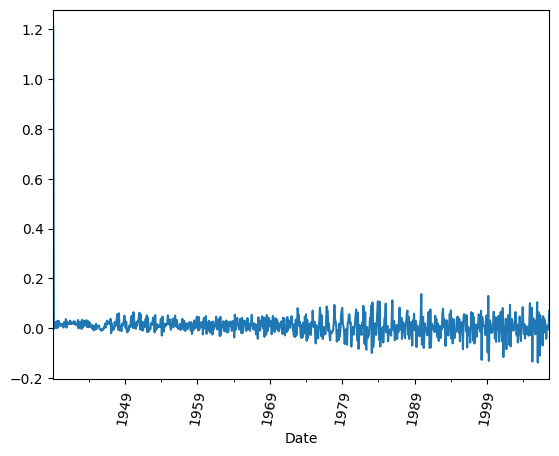

In [9]:
#to plot residuals:
results_ret_ar_2_i_ma_1.resid.plot(rot = 80)

In this plot, the residuals appear to be relatively random, with no clear patterns or trends. This is a good sign, indicating that the model has captured the underlying patterns in the data.

The spread of the residuals seems to be relatively constant over time, suggesting that the model's error terms have a constant variance. This is another desirable property of a good time series model.

While the plot doesn't explicitly show the distribution of the residuals, we can visually inspect for any significant deviations from normality. If the residuals are roughly symmetric and bell-shaped, it suggests that the normality assumption is reasonable


so we conclude the model is performing well. The model has captured the underlying patterns in the data, and the remaining errors are random and have constant variance. 

In [10]:
# Make sure `test` is a 1D array, e.g., test['Log_Production'] or test.values
test_values = test['Log_Production'].values  # Assuming 'Log_Production' is the column name

# Forecast using ARIMA
forecast_arima = results_ret_ar_2_i_ma_1.forecast(steps=len(test_values))

# Check if both arrays have the same length
print(f"Length of test values: {len(test_values)}")
print(f"Length of ARIMA forecast: {len(forecast_arima)}")

# Calculate RMSE for ARIMA
rmse_arima = np.sqrt(mean_squared_error(test_values, forecast_arima))
print(f"RMSE for ARIMA model: {rmse_arima}")


Length of test values: 206
Length of ARIMA forecast: 206
RMSE for ARIMA model: 0.09700342871773471


## SARIMAX MODEL

In [11]:
model_sarimax = sm.tsa.statespace.SARIMAX(train['Log_Production'],order=(2,1,1), seasonal_order=(2,1,1,12))
model_result = model_sarimax.fit()
print(model_result.summary())

c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                     Log_Production   No. Observations:                  824
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                2015.660
Date:                            Thu, 21 Nov 2024   AIC                          -4017.319
Time:                                    18:43:22   BIC                          -3984.431
Sample:                                01-01-1939   HQIC                         -4004.693
                                     - 08-01-2007                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3026      0.105      2.881      0.004       0.097       0.509
ar.L2         -0.1874      0.037   

<Axes: xlabel='Date'>

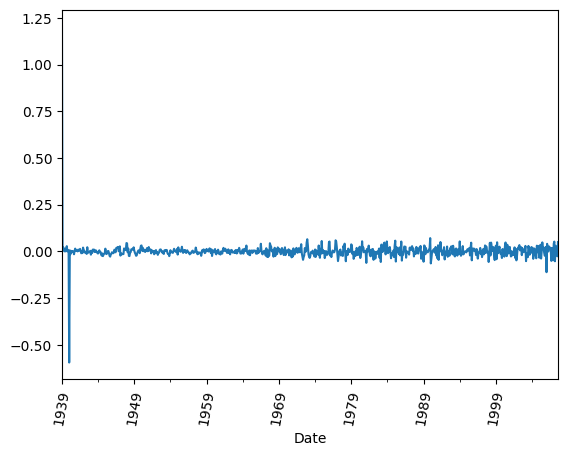

In [12]:
model_result.resid.plot(rot = 80)

Comparison and Conclusion:
AIC and BIC:

SARIMA model has significantly lower AIC (-4017.319) and BIC (-3984.431) compared to the ARIMA model, indicating a better fit despite the added complexity.
Ljung-Box Q statistic:

SARIMA model has a high p-value (0.94), indicating that the residuals are independently distributed.
ARIMA model has a p-value of 0.00, suggesting potential autocorrelation in the residuals.
Jarque-Bera test:

Both models have low p-values (0.00), indicating that the residuals are not normally distributed.
Heteroskedasticity (H) test:

Both models have low p-values (0.00), indicating that the residuals exhibit heteroscedasticity.

Final Decision:
SARIMA Model (SARIMA(2,1,1)x(2,1,1,12)) is the better choice based on the significantly lower AIC and BIC values, and the high p-value from the Ljung-Box Q statistic indicating that the residuals are independently distributed. Although both models exhibit issues with non-normality and heteroscedasticity in the residuals, the SARIMA model offers a better overall fit and addresses seasonality in the data.

In [13]:
# Make sure `test` is a 1D array, e.g., test['Log_Production'] or test.values
test_values = test['Log_Production'].values  # Assuming 'Log_Production' is the column name

# Forecast using SARIMAX
forecast_sarimax = model_result.forecast(steps=len(test_values))

# Check if both arrays have the same length
print(f"Length of test values: {len(test_values)}")
print(f"Length of SARIMAX forecast: {len(forecast_arima)}")

# Calculate RMSE for SARIMAx
rmse_sarimax = np.sqrt(mean_squared_error(test_values, forecast_sarimax))
print(f"RMSE for SARIMAX model: {rmse_sarimax}")


Length of test values: 206
Length of SARIMAX forecast: 206
RMSE for SARIMAX model: 0.21853429387180265


In [14]:
test

,Production,Log_Production,Diff_Production,Seasonal_Diff_Production
Date,,,,
2007-09-01,100.3374,4.608539,-0.117009,0.035789
2007-10-01,91.8884,4.520575,-0.087964,-0.029767
2007-11-01,92.7412,4.529813,0.009238,-0.011553
2007-12-01,105.4420,4.658161,0.128348,0.018280
2008-01-01,113.4467,4.731333,0.073172,-0.010488
...,...,...,...,...
2024-06-01,109.1424,4.692653,0.131165,0.038088
2024-07-01,120.0882,4.788226,0.095573,-0.056394
2024-08-01,118.4131,4.774179,-0.014047,-0.018383


In [15]:
# Create a DataFrame to hold the predictions and the date
predictions_df = pd.DataFrame({
    'Date': test.index,  # Assuming 'Date' is the column with the date or timestamp
    'Actual_Production': test ['Production'],
    'ARIMA_Predicted': np.exp(forecast_arima),
    'SARIMAX_Predicted': np.exp(forecast_sarimax),

    'Actual_log_production': test['Log_Production'],  # The actual values (from the test set)
    'ARIMA_Predicted_LOG': forecast_arima,
    'SARIMAX_Predicted_LOG': forecast_sarimax
    
    
    
})

predictions_df.to_csv('C:/Users/HP/Desktop/times_series_project/Datasets/predictions_comparison.csv')

## XGBOOST

In [16]:
import xgboost as xgb
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [17]:

df_xg.head(5)

,Production
Date,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4608
1939-05-01,3.4608


In [18]:
# Split the data into training and testing sets (80-20 split)
train_size = int(len(df_xg) * 0.8)
train_xg, test_xg = df_xg[:train_size], df_xg[train_size:]

In [19]:

# Prepare data for XGBoost and Linear Regression
train_xg['month'] = train_xg.index.month
train_xg['year'] = train_xg.index.year
test_xg['month'] = test_xg.index.month
test_xg['year'] = test_xg.index.year

C:\Users\HP\AppData\Local\Temp\ipykernel_6088\1449425016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_xg['month'] = train_xg.index.month
C:\Users\HP\AppData\Local\Temp\ipykernel_6088\1449425016.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_xg['year'] = train_xg.index.year
C:\Users\HP\AppData\Local\Temp\ipykernel_6088\1449425016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

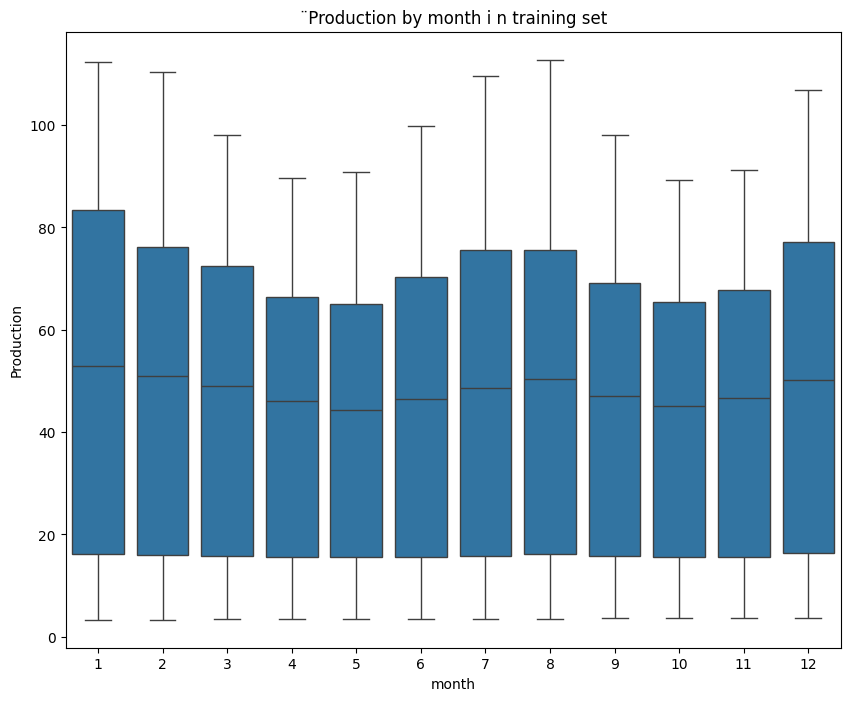

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=train_xg, x='month', y='Production')
ax.set_title('¨Production by month i n training set')
plt.show()

### Interpreting the Production Box Plot
Based on the description of the plot, we can infer the following:

Seasonal Variation: The different heights of the boxes for each month indicate a seasonal pattern in production. Some months have consistently higher production than others, suggesting factors like weather, demand, or production constraints that vary seasonally.

Range of Production: The length of the boxes and whiskers provides information about the range of production values for each month. Months with longer boxes and whiskers have a wider range of production values.

Outliers: The presence of outliers suggests that there might be some unusual events or data errors in the production data for those specific months. These outliers could be due to factors such as machine breakdowns, natural disasters, or economic fluctuations.

Central Tendency: The median line within each box shows the central tendency of the production data for that month. Comparing the medians across different months can help identify significant differences in production levels.

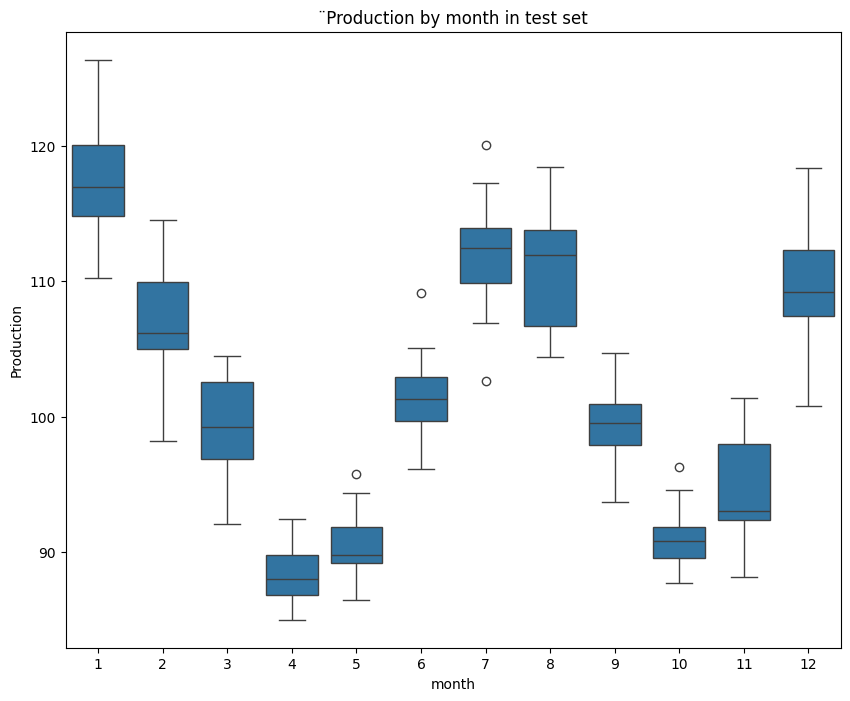

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=test_xg, x='month', y='Production')
ax.set_title('¨Production by month in test set')
plt.show()

In [22]:
FEATURES = ['month', 'year']
TARGET = 'Production'

X_train = train_xg[FEATURES]
y_train = train_xg[TARGET]

X_test = test_xg[FEATURES]
y_test = test_xg[TARGET]

In [23]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:54.16934	validation_1-rmse:100.85502
[100]	validation_0-rmse:20.51374	validation_1-rmse:43.02729


c:\Users\HP\Desktop\times_series_project\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:8.40539	validation_1-rmse:21.59188
[300]	validation_0-rmse:4.27717	validation_1-rmse:13.61177
[400]	validation_0-rmse:2.78324	validation_1-rmse:9.52315
[500]	validation_0-rmse:2.13628	validation_1-rmse:7.20269
[600]	validation_0-rmse:1.80677	validation_1-rmse:5.85591
[700]	validation_0-rmse:1.61323	validation_1-rmse:5.20413
[800]	validation_0-rmse:1.49713	validation_1-rmse:4.87705
[900]	validation_0-rmse:1.39856	validation_1-rmse:4.67635
[999]	validation_0-rmse:1.30683	validation_1-rmse:4.57092


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Analysis:
Convergence:

The training RMSE steadily decreases with each iteration, showing that the model is learning well from the training data.
The validation RMSE also decreases but at a slower rate, which is typical in real-world scenarios.

Performance:

The validation RMSE drops significantly from 43.02729 at iteration 100 to 4.57092 at iteration 999. This indicates that the model's predictions are improving as it is trained for more iterations.
The training RMSE is very low (1.30683), indicating a good fit to the training data.

Potential Overfitting:

The training RMSE is much lower than the validation RMSE (1.30683 vs. 4.57092), which may indicate some overfitting. The model performs extremely well on the training data but not as well on the unseen validation data.
However, the gap between training and validation RMSE is not excessively large, suggesting that the model is generalizing reasonably well.

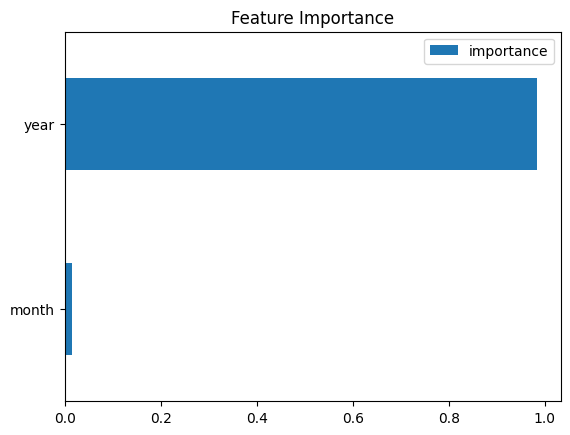

In [24]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6088\1127553465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_xg['prediction'] = reg.predict(X_test)


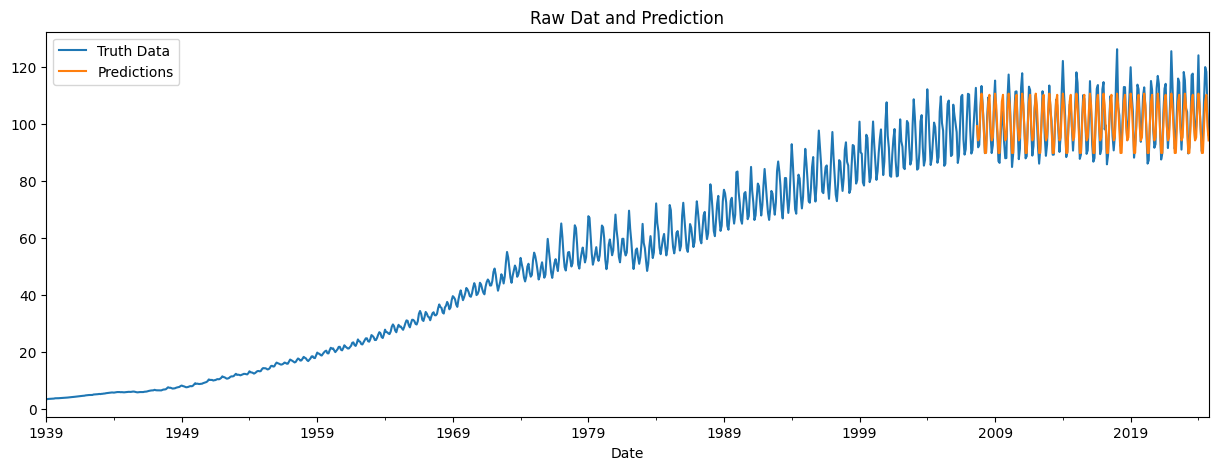

In [25]:
test_xg['prediction'] = reg.predict(X_test)
df_xg = df_xg.merge(test_xg[['prediction']], how='left', left_index=True, right_index=True)
ax = df_xg[['Production']].plot(figsize=(15, 5))
df_xg['prediction'].plot(ax=ax, style='-')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [26]:
score = np.sqrt(mean_squared_error(test_xg['Production'], test_xg['prediction']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 4.57


In [27]:
test_xg['error'] = np.abs(test_xg[TARGET] - test_xg['prediction'])
test_xg['date'] = test_xg.index.date
test_xg.groupby(['date'])['error'].mean().sort_values(ascending=False).head

<bound method NDFrame.head of date
2018-01-01    15.614085
2022-01-01    14.916285
2022-12-01    13.772701
2024-01-01    13.469385
2024-07-01    12.131840
                ...    
2008-05-01     0.151474
2021-03-01     0.107732
2020-02-01     0.064139
2020-06-01     0.057308
2008-04-01     0.042059
Name: error, Length: 206, dtype: float64>

In [ ]:
# Create a DataFrame to hold the predictions and the date
predictions_df_xg = pd.DataFrame({
    'Date': test_xg.index,  # Assuming 'Date' is the column with the date or timestamp
    'XGBoost_Predicted': test_xg['prediction'],  # Replace with the actual XGBoost prediction column
    
})

predictions_df_xg.to_csv('C:/Users/HP/Desktop/times_series_project/Datasets/predictions_xgboost.csv')

In [29]:
# saev model
import pickle

# Save the XGBoost model
with open('C:/Users/HP/Desktop/times_series_project/Models_pkl/xgboost_model.pkl', 'wb') as file:
    pickle.dump(reg, file)
print("Model saved successfully!")

Model saved successfully!
